## Imports

In [1]:
from math import ceil

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import transformers
from transformers import AutoTokenizer
from datasets import load_dataset, load_from_disk

import chess
import chess.svg

from utils.utils import get_stockfish_scores

from IPython.display import SVG, display

In [2]:
board_data = "data/test.csv.gz"
moves_data = "data/subset_games"
stockfish_path = r"C:\Users\barte\Desktop\Studies\chess_bot\PikeBot\engine\stockfish\stockfish-windows-x86-64-avx2.exe"
stockfish = chess.engine.SimpleEngine.popen_uci(stockfish_path)

In [3]:
WHITE = 0
BLACK = 1

## Data

In [4]:
## dataset = load_dataset("adamkarvonen/chess_games") # Big
# dataset = load_dataset("mlabonne/chessllm")

In [5]:
# dataset["train"]

In [6]:
# dataset["train"][0]

In [7]:
# subset = dataset["train"].select(range(1000))
# subset.save_to_disk("data/subset_games")

In [8]:
test_data_moves = load_from_disk(moves_data)
test_data_moves

Dataset({
    features: ['average_elo', 'transcript'],
    num_rows: 1000
})

In [9]:
test_data_moves[0]

{'average_elo': 1500.0,
 'transcript': '1. e4 e5 2. d4 d5 3. exd5 exd4 4. Qxd4 c5 5. Qe4+ Ne7 6. Bg5 f6 7. Nf3 fxg5 8. Nxg5 h6 9. Nh7 Bf5 10. Qe5 Bxh7 11. Nc3 Bxc2 12. Bb5+ Nd7 13. Bxd7+ Qxd7 14. O-O a6 15. Rfe1 b5 16. Ne4 c4 17. d6 Bxe4 18. dxe7 Bxe7 19. Qxe4 Qd2 20. Qxa8+ Kf7 21. Qxh8 Qxb2 22. Rad1 Bc5 23. Rd7+ Kg6 24. Qe8+ Kf5 25. Re4 Qxf2+ 26. Kh1 Qf1# 0-1'}

In [10]:
test_data = pd.read_csv(board_data, compression='gzip')

In [11]:
test_data.sort_values(["game_number", "move_number"])

,game_number,move_number,board,move,legal,stockfish_2,stockfish_5,stockfish_10,real,piece_placement,active_color,castling_availability,en_passant,halfmove_clock,fullmove_number
443,0,1,rnbqkbnr/pppppppp/8/8/8/8/RPPPPPPP/RNBQKBN1 b ...,h1a2,False,NaN,NaN,NaN,False,rnbqkbnr/pppppppp/8/8/8/8/RPPPPPPP/RNBQKBN1,b,Qkq,-,0,1
852,0,1,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,e2e4,True,19.0,7.0,13.0,True,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR,b,KQkq,-,0,1
155,0,2,rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBN...,e7e6,True,-37.0,-37.0,-34.0,True,rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR,w,KQkq,-,0,2
203,0,2,rnbqkbnr/pppppppp/8/6n1/4P3/8/PPPP1PPP/R1BQKBN...,b1g5,False,NaN,NaN,NaN,False,rnbqkbnr/pppppppp/8/6n1/4P3/8/PPPP1PPP/R1BQKBNR,w,KQkq,-,0,2
340,0,3,rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBN...,d2d4,True,13.0,9.0,19.0,True,rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBNR,b,KQkq,-,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,9,88,8/5pk1/6b1/8/8/Qp3P2/2q3P1/6K1 w - - 2 45,c3c2,True,442.0,312.0,552.0,True,8/5pk1/6b1/8/8/Qp3P2/2q3P1/6K1,w,-,-,2,45
39,9,89,8/5pk1/6b1/8/8/Qp3P2/6P1/6KQ b - - 0 45,c2h1,False,NaN,NaN,NaN,False,8/5pk1/6b1/8/8/Qp3P2/6P1/6KQ,b,-,-,0,45
511,9,89,8/5pk1/6b1/8/8/Qp3P2/2q3PK/8 b - - 3 45,g1h2,True,-644.0,-572.0,-546.0,True,8/5pk1/6b1/8/8/Qp3P2/2q3PK/8,b,-,-,3,45
387,9,90,8/5pk1/6b1/8/8/Qpp5/2q3PK/8 w - - 0 46,f3c3,False,NaN,NaN,NaN,False,8/5pk1/6b1/8/8/Qpp5/2q3PK/8,w,-,-,0,46


## Utils

In [12]:
def show_board(board, size=400):
    display(SVG(chess.svg.board(board=board, size=size)))

def get_n_moves(game_transcript, n=10):
    n_games = n + ceil(n/2)
    try:
        return " ".join(game_transcript.split(" ")[:n_games])
    except IndexError:
        return None
    
def get_state_after_moves(game_transcript, n=10):
    board = chess.Board()
    game_str = get_n_moves(game_transcript, n)
    if game_str is None:
        return None
    
    game = [x for x in game_str.split(" ") if not x[0].isdigit()]
    for move in game:
        board.push_san(move)
        
    return board, game_str

def generate_answer(generator, prompt, max_len=40, num_answers=1):
    return [x["generated_text"] for x in generator(prompt, max_length=max_len, num_return_sequences=num_answers, truncation=True, pad_token_id=generator.tokenizer.eos_token_id)]

def generate_next_moves(moves, generator, tokenizer, answer_length=20, num_answers=1):
    query = f"Provide the next move in the chess game. Only provide the move, no move numbers. {moves}"
    tokens = tokenizer.tokenize(query)

    answers = generate_answer(generator, query, max_len=len(tokens)+answer_length, num_answers=num_answers)
    return [answer[len(query)+1:].strip() for answer in answers]

def get_san_legal_moves(board):
    return [board.san(move) for move in board.legal_moves]

def get_color(board_turn):
    return "WHITE" if chess.WHITE == board_turn else "BLACK"

def get_legal_move_evaluations(board, engine, plot_evaluations=False):
    results = {}
    evaluations = []
    player = board.turn

    result = stockfish.analyse(board, chess.engine.Limit(time=0.1))
    prev_score = result["score"].pov(color=player).score()
    # print("Score before move:", prev_score)
    results["prev_score"] = prev_score

    moves = []
    scores_diff = []
    for move in get_san_legal_moves(board):
        board_copy = board.copy()
        board_copy.push_san(move)
        
        result = engine.analyse(board_copy, chess.engine.Limit(time=0.05))
        
        evaluation_score = result["score"].pov(color=player).score()
        evaluations.append(evaluation_score)
        
        moves.append(move)
        scores_diff.append(evaluation_score - prev_score)
        # print("Move:", move, "Score:", evaluation_score)

    scores_diff = np.array(scores_diff)
    scores_mean = np.mean(scores_diff)
    scores_min = min(scores_diff)
    scores_max = max(scores_diff)

    move_min = moves[np.argmin(scores_diff)]
    move_max = moves[np.argmax(scores_diff)]

    # print(f"Best move: {move_max}: {scores_max} | Worst move: {move_min}: {scores_min} | Mean score {scores_mean}")
    results["best_move"] = move_max
    results["worst_move"] = move_min
    results["min_score"] = scores_min
    results["max_score"] = scores_max
    results["mean_score"] = scores_mean

    sorted_moves_evaluations = sorted(zip(moves, evaluations), key=lambda x: x[1], reverse=True)
    sorted_moves, sorted_evaluations = zip(*sorted_moves_evaluations)

    results["sorted_moves"] = list(sorted_moves)
    results["sorted_evaluations"] = list(sorted_evaluations)

    if plot_evaluations:
        plt.figure(figsize=(10, 6))
        plt.bar(sorted_moves, sorted_evaluations)
        plt.xlabel('Evaluation Score')
        plt.ylabel('Moves')
        plt.title('Sorted Evaluation Differences and Corresponding Moves')
        plt.xticks(rotation=45)
        plt.show()

    return results

## Model loading

In [13]:
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("gpt2")
generator = pipeline("text-generation", model="gpt2") # TODO gpt2-xl
generator("Once upon a time,", max_length=40, truncation=True, pad_token_id=generator.tokenizer.eos_token_id)

[{'generated_text': 'Once upon a time, there was a time when the entire world had been at peace and prosperity. Then there began a long, long wait until you had finally found peace on your own planet. Now'}]

In [14]:
generator("Once upon a time,", max_length=10, truncation=True, pad_token_id=generator.tokenizer.eos_token_id)[0]["generated_text"]

'Once upon a time, the first question to be'

In [15]:
generate_answer(generator, "Once upon a time,")

['Once upon a time, with just one step, God found this a wonderful place, and said that He would give his one and only son to the mother of his choice.\n\nNow, when']

In [16]:
# from transformers import GPT2LMHeadModel, GPT2Tokenizer

# gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# starting_context = "The GPT model is great"

# input_ids = tokenizer(starting_context, return_tensors="pt").input_ids

# outputs = gpt_model.generate(
#     input_ids,
#     num_beams=2,
#     num_return_sequences=1,
#     no_repeat_ngram_size=1,
# )
# print(tokenizer.decode(outputs[0], skip_special_tokens=True))

#### Forced alternatives could help choosing legal moves

In [17]:
# from transformers import GPT2LMHeadModel, GPT2Tokenizer

# gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# must_contain_token = "best"
# must_contain_alternatives = ["amazing", "wonderful", "beautiful", "exceptional"]


# force_words_ids = [
#     tokenizer([must_contain_token], add_prefix_space=True, add_special_tokens=False).input_ids,
#     tokenizer(must_contain_alternatives, add_prefix_space=True, add_special_tokens=False).input_ids,
# ]

# starting_text = ["The laptop", "The product"]
# input_ids = tokenizer(starting_text, return_tensors="pt").input_ids


# outputs = gpt_model.generate(
#     input_ids,
#     force_words_ids=force_words_ids,
#     num_beams=10,
#     num_return_sequences=1,
#     no_repeat_ngram_size=1,
#     remove_invalid_values=True,
# )
# print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# print(tokenizer.decode(outputs[1], skip_special_tokens=True))

## Evaluation based on previous moves

Assumptions:
- The first move in the answer is the next intended move.

#### TODO ideas:
1. Evaluate multiple answers to the same situation
    - calculate mean score improvement
    - number of worst/best moves
    - compare to stockfish evals
    - number of legal moves
    - compare to performance for situations closer and further from the beginning of the game (longer/shorter prompt moves context)
    
2. Constrict to legal moves by allowing for max length output 2-4 tokens and providing must contain alternatives = legal moves, compare relevant results
3. Compare performance/game to a random move player
4. Run as long as legal move not reached/only for legal moves, append move to prompt and evaluate again
5. Compare results to gpt2-xl
6. Check how many consecutive legal moves can be found with increased max length output
7. Experiment with beam search options

#### Test 1: for a single situation analyse gpt answers

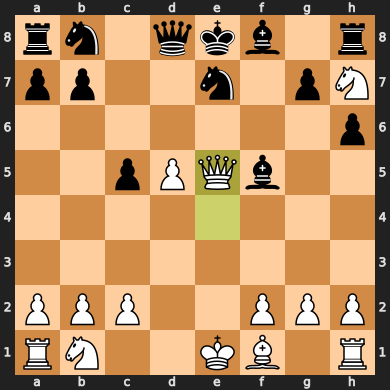

In [18]:
transcript = test_data_moves['transcript'][0]
board, moves = get_state_after_moves(transcript, 19)

player = board.turn
board

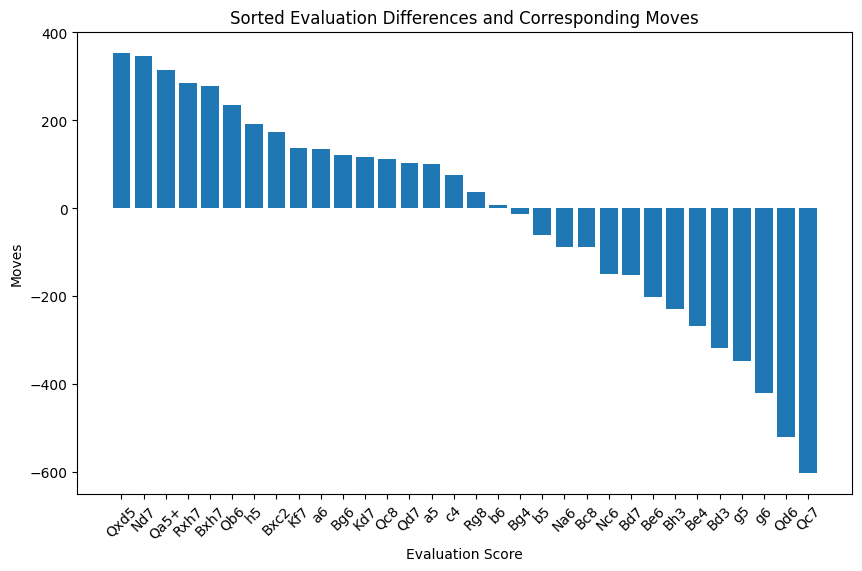

In [19]:
results = get_legal_move_evaluations(board, stockfish, plot_evaluations=True)

In [20]:
# data = {"Moves": results["sorted_moves"], "Evaluation Score": results["sorted_evaluations"]}
# df = pd.DataFrame(data)

# plt.figure(figsize=(4, 6))
# sns.violinplot(y="Evaluation Score", data=df, inner=None)
# plt.ylabel('Evaluation Score')
# plt.title('Violin Plot of Evaluations for Moves')
# plt.show()

In [21]:
results["mean_score"]

-317.5

In [22]:
answers = generate_next_moves(moves, generator, tokenizer, answer_length=10, num_answers=100)
legal_moves = get_san_legal_moves(board)
for next_moves in answers:
    next_moves = [move for move in next_moves.split(" ") if move[0].isalpha()]

    if len(next_moves) == 0:
        print("No valid moves")
        continue

    next_move = next_moves[0]
    print(f"\nGPT Player: {get_color(player)} | Move(?): {next_move} | In legal moves: {next_move in legal_moves}")
    if next_move in legal_moves:
        board_copy = board.copy()
        board_copy.push_san(next_move)
        result = stockfish.analyse(board_copy, chess.engine.Limit(time=0.1))
        evaluation_score = result["score"].pov(color=player).score()
        evaluation_diff = evaluation_score - results['prev_score']
        print(f" - Score before move: {results['prev_score']}\n - Score after move: {evaluation_score}\n - Is best move: {next_move==results['best_move']}\n - Is worst move: {next_move==results['worst_move']}\n - Is above average move: {evaluation_diff > results['mean_score']}")


GPT Player: BLACK | Move(?): h7 | In legal moves: False

GPT Player: BLACK | Move(?): f5 | In legal moves: False

GPT Player: BLACK | Move(?): Nxg5 | In legal moves: False

GPT Player: BLACK | Move(?): Bxg5 | In legal moves: False

GPT Player: BLACK | Move(?): Rxe5 | In legal moves: False

GPT Player: BLACK | Move(?): h3 | In legal moves: False

GPT Player: BLACK | Move(?): c4 | In legal moves: True
 - Score before move: 307
 - Score after move: 109
 - Is best move: False
 - Is worst move: False
 - Is above average move: True

GPT Player: BLACK | Move(?): Kh6 | In legal moves: False

GPT Player: BLACK | Move(?): cxb5 | In legal moves: False

GPT Player: BLACK | Move(?): dxc5 | In legal moves: False

GPT Player: BLACK | Move(?): Bxg5 | In legal moves: False

GPT Player: BLACK | Move(?): Bxe7 | In legal moves: False

GPT Player: BLACK | Move(?): Kf6 | In legal moves: False

GPT Player: BLACK | Move(?): Qb8 | In legal moves: False

GPT Player: BLACK | Move(?): Nxg5 | In legal moves: Fals

In [23]:
# transcript = test_data_moves['transcript'][0]
# board, moves = get_state_after_moves(transcript, 3)

# while not board.is_checkmate():
#     next_moves = generate_next_moves(moves, generator, tokenizer)
#     next_move = [move for move in next_moves[0].split(" ") if move[0].isalpha()][0]

#     legal_moves = get_san_legal_moves(board)
#     if next_move in legal_moves:
#         board.push_san(next_move)
#         show_board(board)
#         moves += " " + next_move
#         print(moves)

## Evaluation based on game board

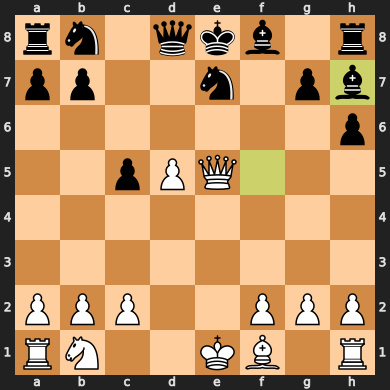

In [18]:
board = chess.Board()
game = test_data_moves[0]["transcript"].split(" ")
res = game[-1]
game = [[x, y] for x, y in zip(game[1::3], game[2::3])]

for turn in game[:10]:
    board.push_san(turn[WHITE])
    board.push_san(turn[BLACK])

board

In [19]:
get_stockfish_scores(board, stockfish, board.turn, time_limit=0.1), "WHITE" if chess.WHITE == board.turn else "BLACK"

((-46, -5, -211), 'WHITE')

In [20]:
generate_answer(generator, f"Provide the next move in the chess game. Only provide the move, no move numbers. {board.fen()}. Next move is A:", max_len=100)

['Provide the next move in the chess game. Only provide the move, no move numbers. rn1qkb1r/pp2n1pb/7p/2pPQ3/8/8/PPP2PPP/RN2KB1R w KQkq - 0 11. Next move is A: Q, A 2 Q P P, Q Z S Y A CQ B Q Y A Q Q B Y B KY D C B']

In [22]:
test_data.board.iloc[0]

'r4b1r/pp1bnkp1/1q2B3/2ppP2p/5P2/2PP1K1P/PP1N4/R1B2R2 b - - 0 19'

In [23]:
board = chess.Board(test_data.board.iloc[0])

print(board)

r . . . . b . r
p p . b n k p .
. q . . B . . .
. . p p P . . p
. . . . . P . .
. . P P . K . P
P P . N . . . .
R . B . . R . .


In [27]:
generate_answer(generator, f"Provide the next move in the chess game. Only provide the move, no move numbers. {board.__str__()}. Next move is A:", max_len=150)

['Provide the next move in the chess game. Only provide the move, no move numbers. r . . . . b . r\np p . b n k p .\n. q . . B . . .\n. . p p P . . p\n. . . . . P . .\n. . P P . K . P\nP P . N . . . .\nR . B . . R . .. Next move is A: b.\n. q b p p p q q p p B: s p p p p p\nB. S. p p p p p v. p p\nS. S.. p p p p P p. P\nS. S..']